# 0 - Abstract - Introduction

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Attribute information

- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $
- Quantity: Number of products purchased by customer
- Tax: 5 \% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

The data set is obtained from [Kaggle](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)

# 1 - Loading Libraries

In [3]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print("It is good to go, lift off chief.")

It is good to go, lift off chief.


In [4]:
_sales = pd.read_csv('Data\supermarket_sales.csv')
_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [89]:
_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [11]:
col_names = _sales.columns.to_frame()

In [30]:
# for name in col_names[0]:
#     print(_sales[name].value_counts().to_frame()) #.unique())

In [95]:
_sales['gross margin percentage'].unique()

array([4.76190476])

In [98]:
_sales['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [5]:
_sales['Date'].describe()

count         1000
unique          89
top       2/7/2019
freq            20
Name: Date, dtype: object

In [81]:
_sales['Date'].value_counts()

2/7/2019     20
2/15/2019    19
3/14/2019    18
3/2/2019     18
1/8/2019     18
             ..
1/4/2019      6
2/28/2019     6
2/21/2019     6
3/17/2019     6
2/1/2019      6
Name: Date, Length: 89, dtype: int64

there are purchases at least 6 times in a single day

In [88]:
_sales['Invoice ID'].value_counts().sum()

1000

Each invoice in 1000 invoices is unique, still there is a porbability that multiple invoices belong to a single customer. for example if `'Branch'` = `'Customer type'` = `'Gender'` = `'Payment'` this might be the same customer.

### Question 
how to filter data frame for example to check only `'Sports and travel'`

# 2 - Data Cleaning

## 2.1 - Converting data type of `'Date'` column to `datetime`


In [58]:
_sales['Date'].head()

0     1/5/2019
1     3/8/2019
2     3/3/2019
3    1/27/2019
4     2/8/2019
Name: Date, dtype: object

Because the dtype of `'Data'` column is `object` rather than `datetime64`, Python doesn't know that this column contains dates. It is better to convert `'Date'` column from `object` to `datetime64`.

It is possible to parse date format manually.

In [34]:
# sales['date_parsed'] = pd.to_datetime(sales['Date'], format="%m/%d/%y")
# sales['date_parsed'].head()

But this code returns an error for the current data set (it worths to work on this issue later):

'*ValueError: unconverted data remains: 19*'

Alternative way to format dates is letting `pandas` to guess the date format by using `infer_datetime_format=True` argument.\
This approach allows pandas to try to infer what the right date format should be.

1- It is either creating a new column:

In [56]:
sales = pd.read_csv('Data\supermarket_sales.csv')

sales['date_parsed'] = pd.to_datetime(sales['Date'], infer_datetime_format=True)
sales['date_parsed'].head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: date_parsed, dtype: datetime64[ns]

2- Or alter the column that contains the time data during reading the data from the desired source.

In [126]:
sales = pd.read_csv('Data\supermarket_sales.csv', 
                    parse_dates=['Date'],
                    infer_datetime_format=True)
sales['Date'].head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

In [60]:
print(sales.Date.dtype)

datetime64[ns]


Though it is possible to set `'Date'` column as `index` while reading the data by using `index_col=<column name>` argument, a better approach would be using `set_index(<column name>)` function to be able to benefit from `to_period()` function to observe the data in desired periods. The periods and arguments are; **D**ay, **W**eek, **M**onth, **Q**uarter, and **Y**ear.

In [127]:
sales = sales.set_index('Date').to_period('D')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Why not observe the data through `'Branch'` and `'Product line'` breakdown respectively.

In [ ]:
sales = sales.set_index(['Branch', 'Product line'], append=True)
sales = sales.sort_index()

In [132]:
sales.tail(11)

Invoice ID       City  \
Date       Branch Product line                                     
2019-03-30 A      Electronic accessories  676-39-6028     Yangon   
                  Home and lifestyle      291-55-6563     Yangon   
                  Sports and travel       286-01-5402     Yangon   
                  Sports and travel       361-85-2571     Yangon   
           B      Food and beverages      642-61-4706   Mandalay   
                  Health and beauty       743-04-1105   Mandalay   
                  Health and beauty       731-59-7531   Mandalay   
           C      Electronic accessories  364-34-2972  Naypyitaw   
                  Fashion accessories     115-38-7388  Naypyitaw   
                  Food and beverages      131-15-8856  Naypyitaw   
                  Health and beauty       778-89-7974  Naypyitaw   

                                         Customer type  Gender  Unit price  \
Date       Branch Product line                                               
2019-03-30 A      Electronic accessories        Member  Female       64.44   
                  Home and lifestyle            Member  Female       34.42   
                  Sports and travel             Normal  Female       40.23   
                  Sports and travel             Normal  Female       89.48   
           B      Food and beverages            Member    Male       93.40   
                  Health and beauty             Member    Male       97.22   
                  Health and beauty             Member    Male       72.57   
           C      Electronic accessories        Member    Male       96.82   
                  Fashion accessories           Member  Female       10.18   
                  Food and beverages            Member  Female       72.52   
                  Health and beauty             Normal    Male       70.21   

                                          Quantity   Tax 5%     Total   Time  \
Date       Branch Product line                                                 
2019-03-30 A      Electronic accessories         5  16.1100  338.3100  17:04   
                  Home and lifestyle             6  10.3260  216.8460  12:45   
                  Sports and travel              7  14.0805  295.6905  13:22   
                  Sports and travel              5  22.3700  469.7700  10:18   
           B      Food and beverages             2   9.3400  196.1400  16:34   
                  Health and beauty              9  43.7490  918.7290  14:43   
                  Health and beauty              8  29.0280  609.5880  17:58   
           C      Electronic accessories         3  14.5230  304.9830  20:37   
                  Fashion accessories            8   4.0720   85.5120  12:51   
                  Food and beverages             8  29.0080  609.1680  19:26   
                  Health and beauty              6  21.0630  442.3230  14:58   

                                              Payment    cogs  \
Date       Branch Product line                                  
2019-03-30 A      Electronic accessories         Cash  322.20   
                  Home and lifestyle          Ewallet  206.52   
                  Sports and travel              Cash  281.61   
                  Sports and travel              Cash  447.40   
           B      Food and beverages             Cash  186.80   
                  Health and beauty           Ewallet  874.98   
                  Health and beauty              Cash  580.56   
           C      Electronic accessories         Cash  290.46   
                  Fashion accessories     Credit card   81.44   
                  Food and beverages      Credit card  580.16   
                  Health and beauty              Cash  421.26   

                                          gross margin percentage  \
Date       Branch Product line                                      
2019-03-30 A      Electronic accessories                 4.761905   
                  Home and lifestyle             

In [141]:
total_sales = sales.groupby('Date').sum()['Total'].to_frame()

time = np.arange(len(total_sales.index))
total_sales['time'] = time

total_sales.head()

,Total,time
Date,,
2019-01-01,4745.1810,0
2019-01-02,1945.5030,1
2019-01-03,2078.1285,2
2019-01-04,1623.6885,3
2019-01-05,3536.6835,4


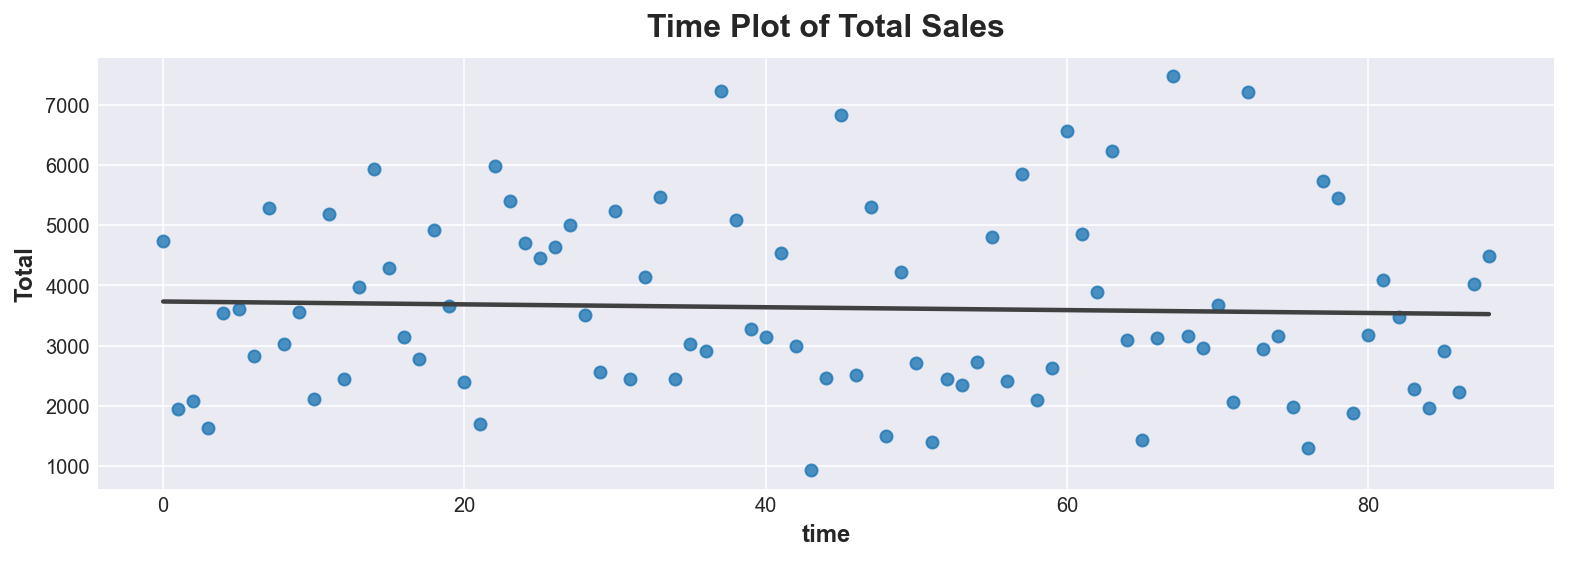

In [167]:
sns.set_style('darkgrid')
plt.figure(figsize=(11,4))
plt.title("Time Plot of Total Sales")

sns.regplot(data = total_sales, x='time', y='Total', ci=None, line_kws=dict(color='0.25'));

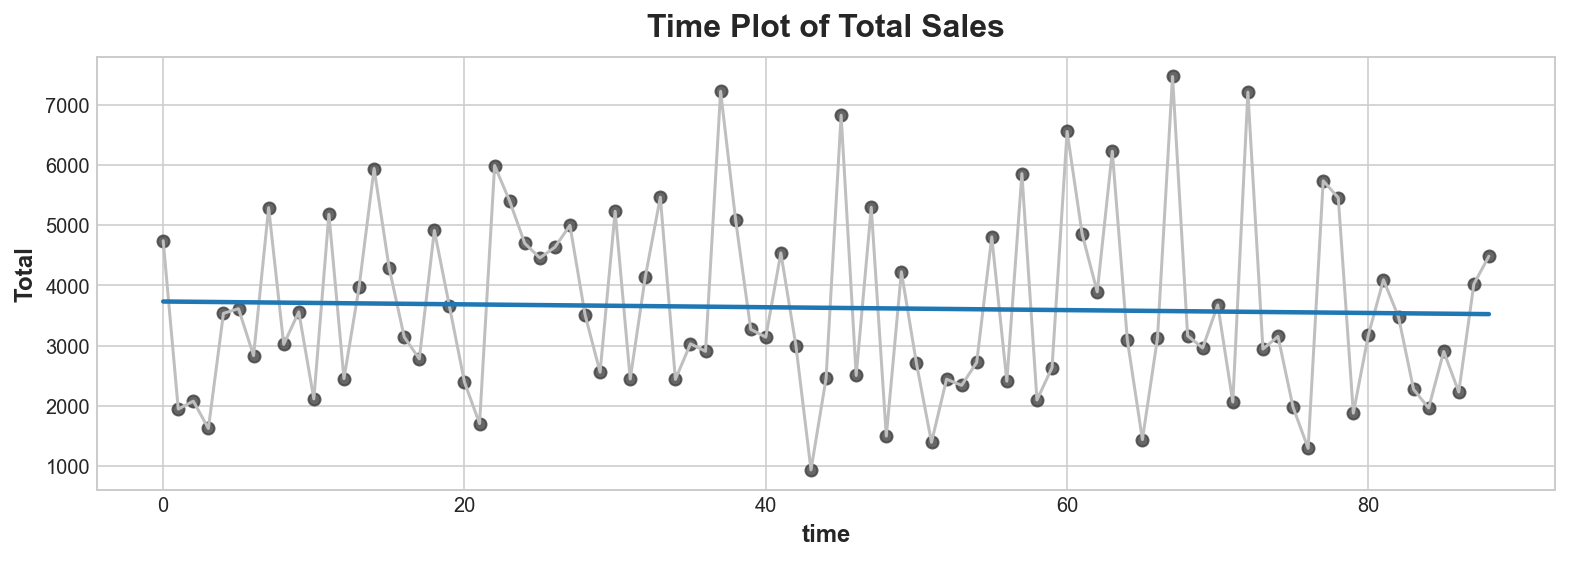

In [163]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('time', 'Total', data=total_sales, color='0.75')
ax = sns.regplot(x='time', y='Total', data=total_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Total Sales');

In [55]:
prod_line = sales['Product line'].unique()
prod_line[3]

'Sports and travel'

# 3 - Feature Engineering

## 3.1 - Target/One-Hot Encoding

## 3.2 - Introducing `'Time'` dummy as a `time-step feature`.

In [59]:
# sales['Time'] = np.arange(len(sales.index))

# sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,0,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,3,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,4,Ewallet,604.17,4.761905,30.2085,5.3


## 3.2 - Introducing `'Lag_i'` dummy as a `lag feature`.

In [71]:
# TARGET ENCODING FIRST!!!!!

# sales['Lag_1'] = sales['cogs'].shift(1)
# sales = sales.reindex(columns=['Product line', 'Lag_1'])

# sales.head()